In [7]:
import pandas as pd
assay_df = pd.read_csv("assay6.csv")
print(assay_df.shape)
assay_df.info()
assay_df.head()

(602, 481)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Columns: 481 entries, sample41_1 to Unnamed: 480
dtypes: float64(1), object(480)
memory usage: 2.2+ MB


,sample41_1,Unnamed: 1,sample41_2,Unnamed: 3,sample41_3,Unnamed: 5,sample41_4,Unnamed: 7,sample41_5,Unnamed: 9,...,Unnamed: 471,sample41_237,Unnamed: 473,sample41_238,Unnamed: 475,sample41_239,Unnamed: 477,sample41_240,Unnamed: 479,Unnamed: 480
0,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,...,Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,NaN
1,799.9906616,-0.02253002301,799.9906616,-0.02356330119,799.9906616,-0.02169088088,799.9906616,-0.02369254641,799.9906616,-0.0209712889,...,-0.02568219788,799.9906616,-0.02370034158,799.9906616,-0.02455053665,799.9906616,-0.02634423785,799.9906616,-0.02482018434,NaN
2,799.0167847,-0.02276570536,799.0167847,-0.02190915123,799.0167847,-0.02357139252,799.0167847,-0.02493976802,799.0167847,-0.01846881397,...,-0.02449568547,799.0167847,-0.02614315413,799.0167847,-0.02520238422,799.0167847,-0.02267751098,799.0167847,-0.02501450293,NaN
3,798.0076294,-0.02370014414,798.0076294,-0.02433026209,798.0076294,-0.02418372594,798.0076294,-0.0238812454,798.0076294,-0.02269323543,...,-0.02828440815,798.0076294,-0.02606758848,798.0076294,-0.02622411586,798.0076294,-0.02785519511,798.0076294,-0.02596128732,NaN
4,796.9981689,-0.02366842702,796.9981689,-0.02265653014,796.9981689,-0.02423014492,796.9981689,-0.02569288388,796.9981689,-0.01833254658,...,-0.02530125156,796.9981689,-0.0258489605,796.9981689,-0.02614446916,796.9981689,-0.024046693,796.9981689,-0.02593602613,NaN


In [12]:
assay_df = assay_df.drop(index=0).reset_index(drop=True)
assay_df.head()
print(assay_df.shape)
assay_df.dtypes

(597, 481)


sample41_1       object
Unnamed: 1       object
sample41_2       object
Unnamed: 3       object
sample41_3       object
                 ...   
sample41_239     object
Unnamed: 477     object
sample41_240     object
Unnamed: 479     object
Unnamed: 480    float64
Length: 481, dtype: object

In [14]:
assay_df = assay_df.apply(pd.to_numeric, errors='coerce')
assay_df.dtypes.value_counts()

float64    481
Name: count, dtype: int64

In [15]:
# Extract first sample (sample41_1)
wavelength = assay_df.iloc[:, 0]
absorbance = assay_df.iloc[:, 1]

# Combine into a DataFrame
sample1 = pd.DataFrame({
    'Wavelength': wavelength,
    'Absorbance': absorbance
})

# Sort by wavelength (increasing order)
sample1_sorted = sample1.sort_values(by='Wavelength').reset_index(drop=True)

# Preview the sorted sample
sample1_sorted.head()


,Wavelength,Absorbance
0,200.016617,2.918569
1,201.007370,3.136498
2,201.998032,10.000000
3,202.988617,2.930152
4,204.018753,2.887803


In [16]:
# Filter to keep only rows where wavelength is between 400 and 600 nm
sample1_filtered = sample1_sorted[
    (sample1_sorted['Wavelength'] >= 400) & 
    (sample1_sorted['Wavelength'] <= 600)
].reset_index(drop=True)

# Preview the result
sample1_filtered.head()


,Wavelength,Absorbance
0,400.006409,0.116441
1,401.012787,0.124039
2,402.018982,0.131409
3,402.986298,0.138193
4,403.992188,0.144190


In [17]:
# Save the filtered sample to a CSV file
sample1_filtered.to_csv("truncated data set.csv", index=False)


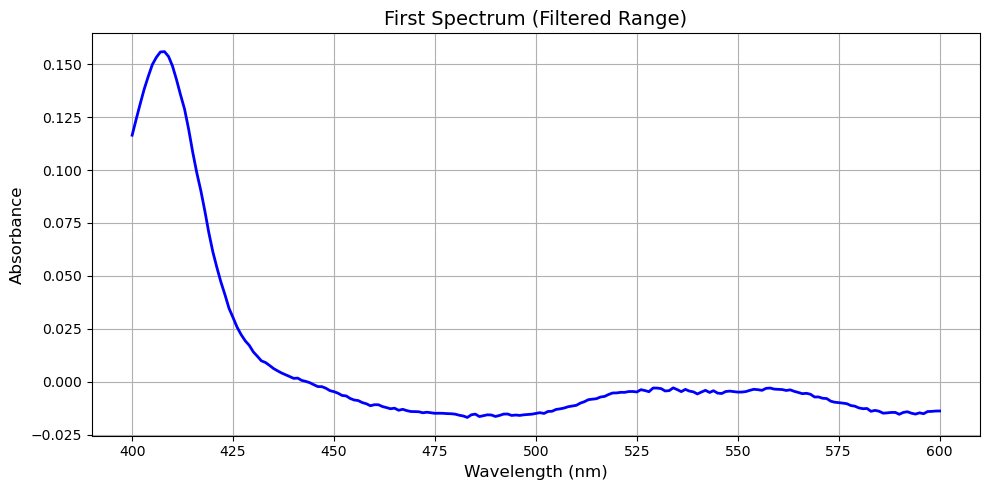

In [18]:
import matplotlib.pyplot as plt

# Plotting the filtered spectrum
plt.figure(figsize=(10, 5))
plt.plot(sample1_filtered['Wavelength'], sample1_filtered['Absorbance'], color='blue', linewidth=2)

# Styling the chart
plt.title('First Spectrum (Filtered Range)', fontsize=14)
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [19]:
assay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Columns: 481 entries, sample41_1 to Unnamed: 480
dtypes: float64(481)
memory usage: 2.2 MB
